1.Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
car=pd.read_csv("s3://teslacarprice/Automobile_data.csv")

In [3]:
car.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


Summary of the Data

In [4]:
print("Rows:",car.shape[0])
print("Columns:",car.shape[1])
print("\nFeatures:\n",car.columns.tolist())
print("\nMissing Values:",car.isnull().values.sum())
print("\nUnique Values:\n",car.nunique())

Rows: 205
Columns: 26

Features:
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Missing Values: 0

Unique Values:
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm             

In [5]:
total=car.isnull().sum().sort_values(ascending=False)
percent=((car.isnull().sum())*100)/car.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'],sort=False).sort_values('Total',ascending=False)
missing_data.head(40)

,Total,Percent
price,0,0.0
highway-mpg,0,0.0
city-mpg,0,0.0
peak-rpm,0,0.0
horsepower,0,0.0
compression-ratio,0,0.0
stroke,0,0.0
bore,0,0.0
fuel-system,0,0.0
engine-size,0,0.0


In [6]:
car.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

Handling Missing Data

In [7]:
a=car[car['normalized-losses']!='?']
b=(a['normalized-losses'].astype(int)).mean()
car['normalized-losses']=car['normalized-losses'].replace('?',b).astype(int)

Cleaning num-of-doors

In [8]:
a=car[car['body-style']=='sedan']
a['num-of-doors'].value_counts()

four    79
two     15
?        2
Name: num-of-doors, dtype: int64

In [9]:
a=car['num-of-doors'].map({'two':2,'four':4,'?':4})
car['num-of-doors']=a

In [11]:
a=car[car['price']!='?']
carb=(a['price'].astype(int)).mean()
car['price']=car['price'].replace('?',b).astype(int)

a=car[car['horsepower']!='?']
b=(a['horsepower'].astype(int)).mean()
car['horsepower']=car['horsepower'].replace('?',b).astype(int)

a=car[car['bore']!='?']
b=(a['bore'].astype(float)).mean()
car['bore']=car['bore'].replace('?',b).astype(float)

a=car[car['stroke']!='?']
b=(a['stroke'].astype(float)).mean()
car['stroke']=car['stroke'].replace('?',b).astype(float)

a=car[car['peak-rpm']!='?']
b=(a['peak-rpm'].astype(float)).mean()
car['peak-rpm']=car['peak-rpm'].replace('?',b).astype(float)



In [12]:
a=car['num-of-cylinders'].map({'four':4,'five':5,'six':6,'?':4})
car['num-of-doors']=a

Getting the basic Stats

In [13]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,205.0,122.000000,31.681008,65.00,101.00,122.00,137.00,256.00
num-of-doors,194.0,4.304124,0.679289,4.00,4.00,4.00,4.00,6.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329751,0.270844,2.54,3.15,3.31,3.58,3.94


Exploratory Data Analysis

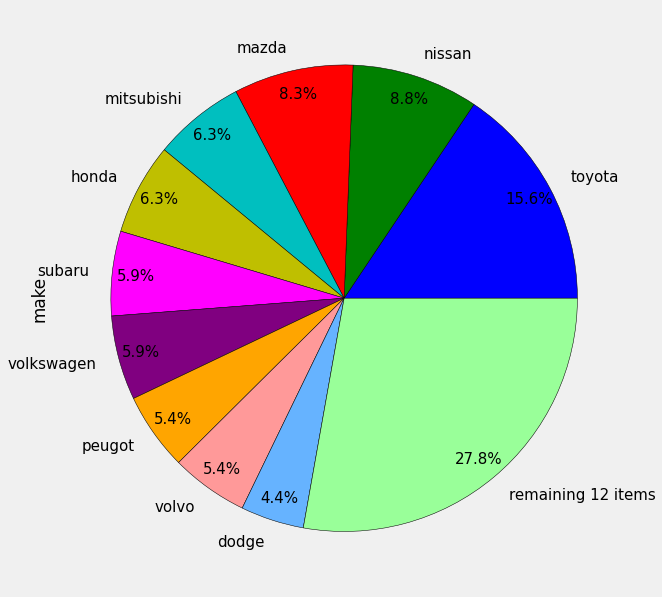

In [14]:
colors = ['b','g','r','c','y','magenta','purple','orange','#ff9999','#66b3ff','#99ff99']
temp = car['make'].value_counts()
temp2 = temp.head(10)
if len(temp) > 10:
   temp2['remaining {0} items'.format(len(temp)-10)] = sum(temp[10:])
temp2.plot(kind='pie',autopct="%1.1f%%",shadow=False,fontsize=15,pctdistance=0.9,colors=colors,wedgeprops={"edgecolor":"0","linewidth":0.5,"linestyle":"solid","antialiased":True},figsize=(15,10)) 

pass

Fuel-Type

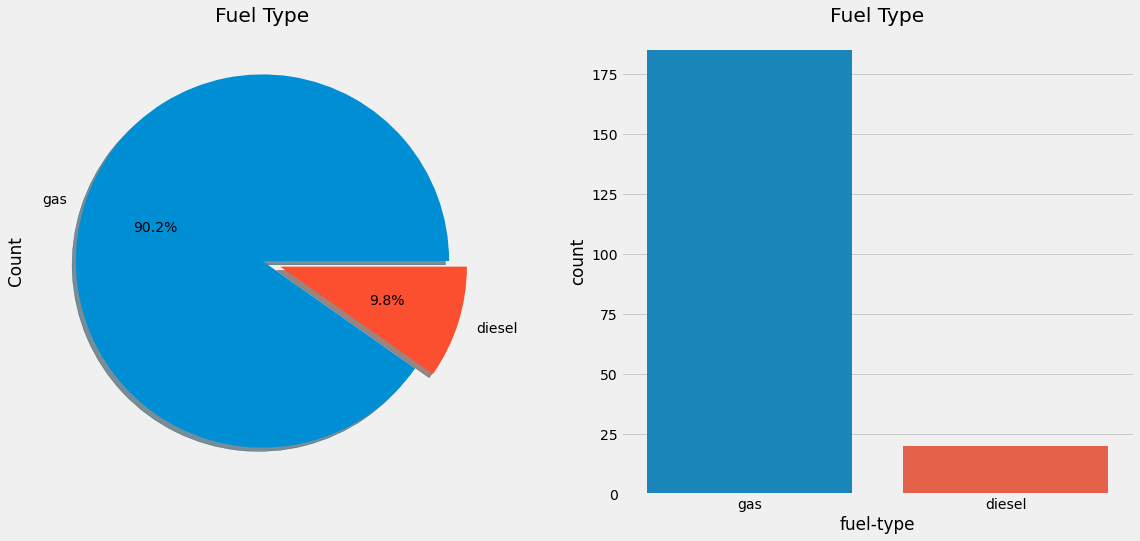

In [15]:
pd.crosstab(car.make,car['fuel-type'],margins=True).T.style.background_gradient(cmap='summer_r')

f,ax=plt.subplots(1,2,figsize=(18,8))
car['fuel-type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type')
ax[0].set_ylabel('Count')
sns.countplot('fuel-type',data=car,ax=ax[1],order=car['fuel-type'].value_counts().index)
ax[1].set_title('Fuel Type')
plt.show()

In [17]:
print('Car makers in the Dataset are',car['make'].unique())

Car makers in the Dataset are ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


Price Based on type of Vehicle

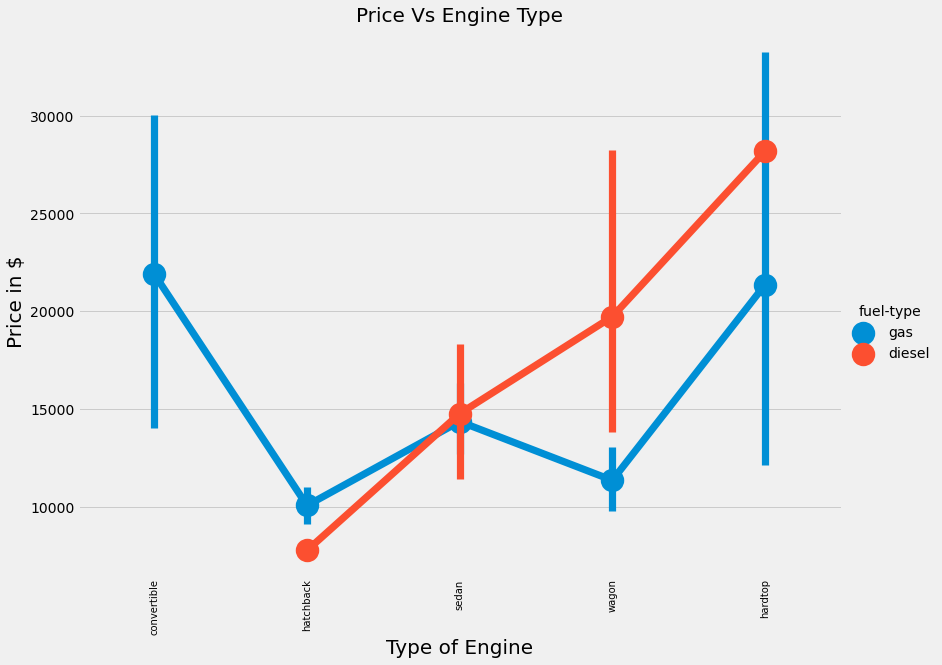

In [18]:
sns.factorplot(data=car, y="price", x="body-style" , hue="fuel-type" ,kind="point",height=8.27, aspect=11.7/8.27)
plt.xlabel('Type of Engine',fontsize=20)
plt.ylabel('Price in $',fontsize=20)
plt.title('Price Vs Engine Type',fontsize=20)
plt.tick_params(axis='x',labelsize=10,rotation=90)

Car Price Based on Drive

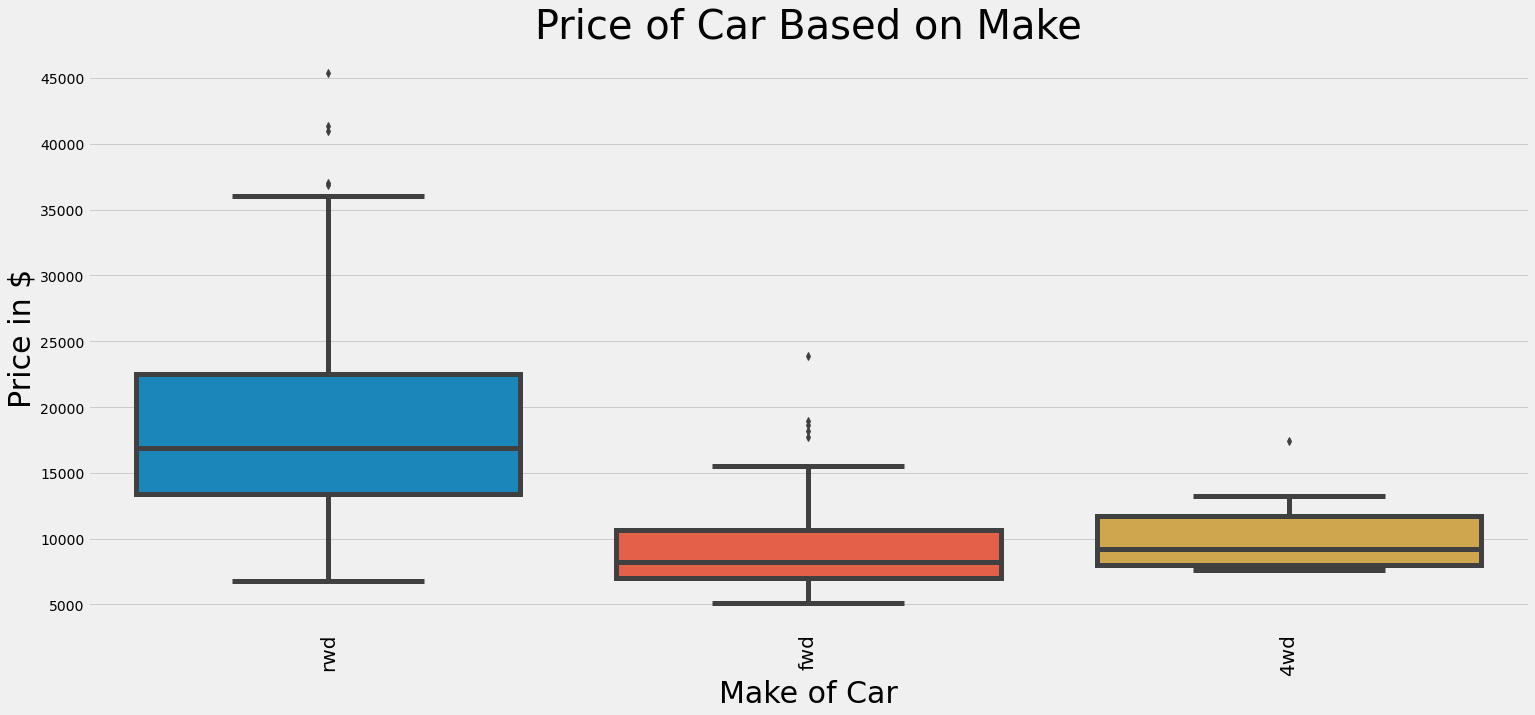

In [19]:
plt.rcParams['figure.figsize']=(23,10)
ax=sns.boxplot(x='drive-wheels',y='price',data=car,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of Car Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

<AxesSubplot:>

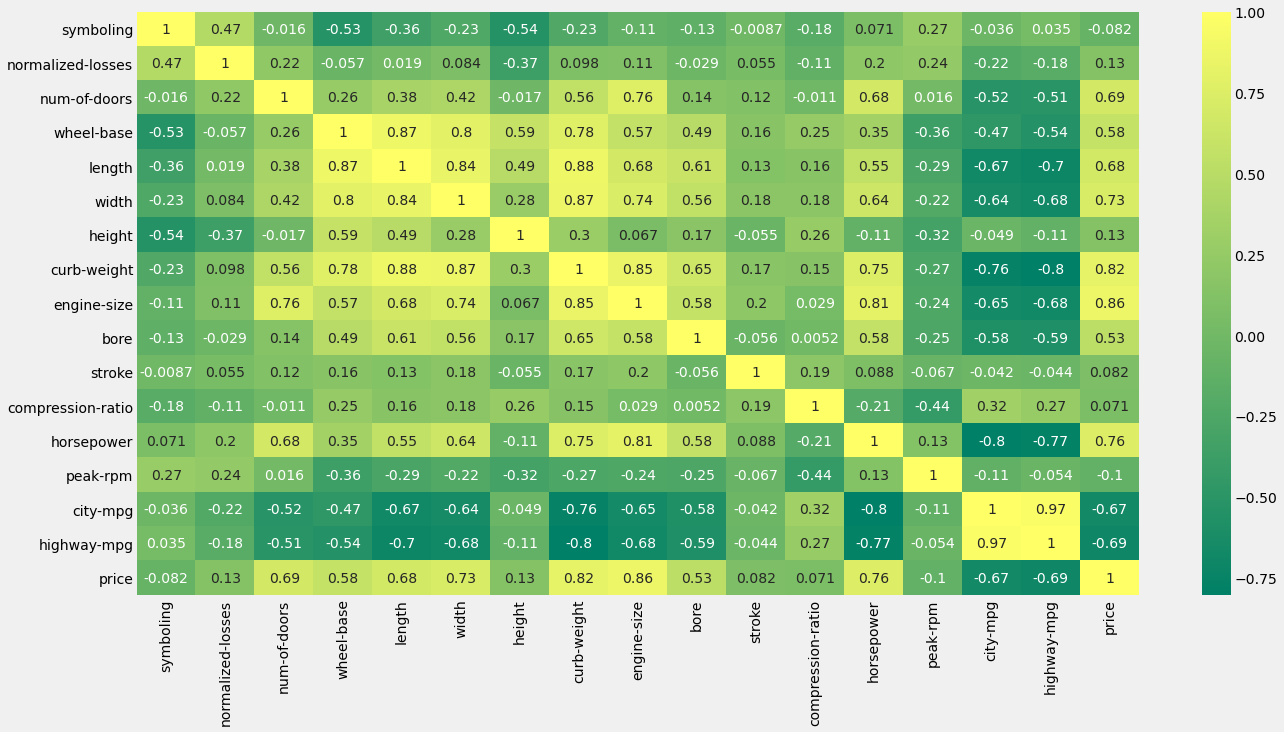

In [21]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(car.corr(),annot=True,cmap='summer')

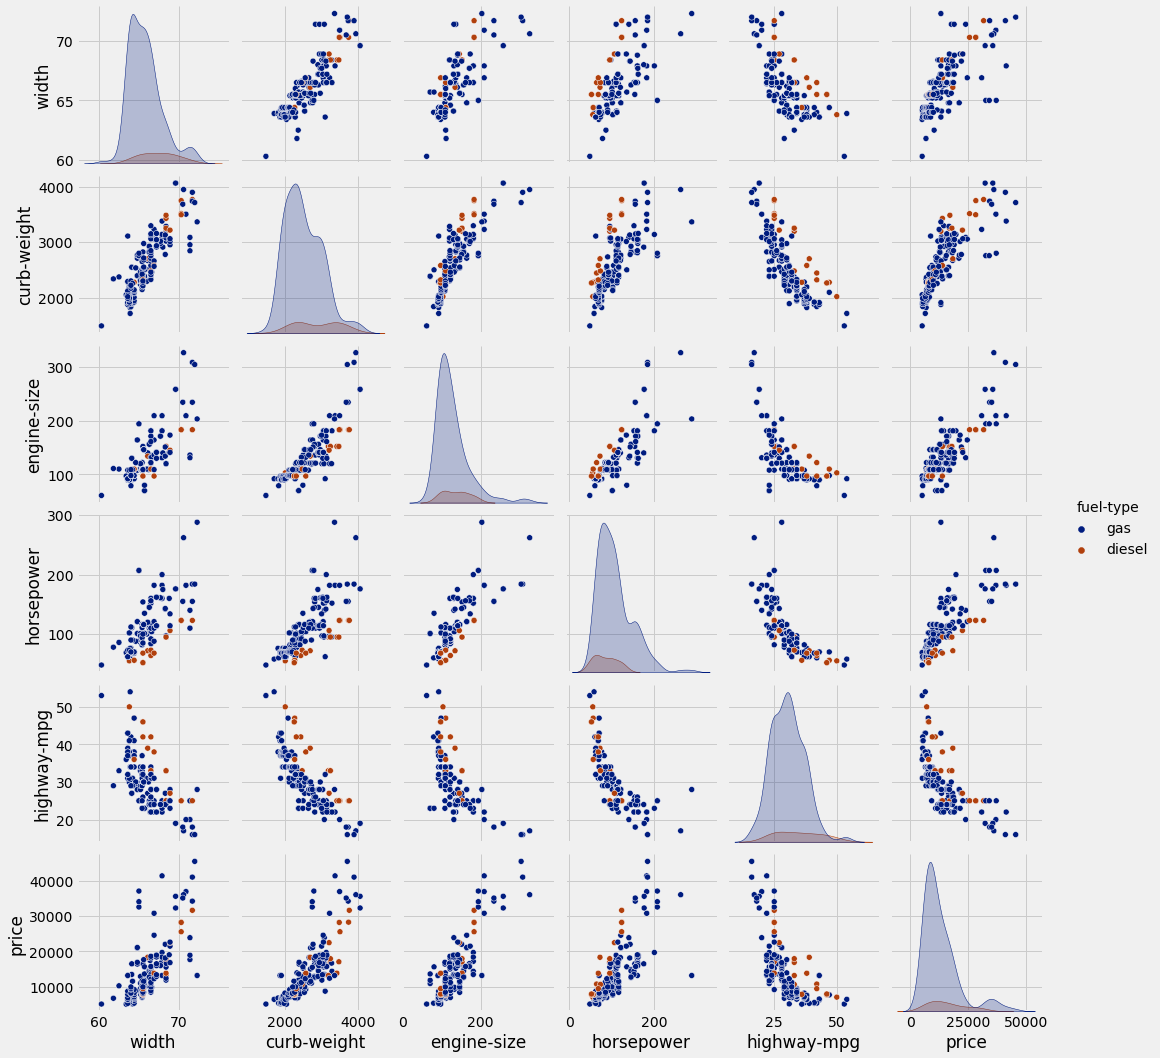

In [22]:
ax = sns.pairplot(car[["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price",]], hue="fuel-type",palette='dark')

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [25]:
X=car.iloc[:,[11,13,16,21]].values
y=car.iloc[:,-1].values

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10)
print('Training Set:',len(X_train))
print('Test Set:',len(X_test))
print('Training labels:',len(y_train))
print('Test labels:',len(y_test))

Training Set: 184
Test Set: 21
Training labels: 184
Test labels: 21


In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
'''Get Predictions & Print Metrics'''
predicts = lr.predict(X_test)
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts),
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 6215.10666134208
        R2 Score: 0.0934079004201851
        Mean Absolute Error: 3707.199157349764
     


In [30]:
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test,predicts))
print('RMSE of the model:',rmse)

RMSE of the model: 6215.10666134208


In [31]:
r2_train = lr.score(X_train,y_train)
r2_test = lr.score(X_test,y_test)
print('R Squared Error for Train set:',r2_train)
print('R Squared Error for Test set:',r2_test)

R Squared Error for Train set: 0.813046741783223
R Squared Error for Test set: 0.0934079004201851


In [ ]:
total=car.isnull().sum().sort_values(ascending=False)
percent=((car.isnull().sum())*100)/

Visualization of the predicted with the Train

In [32]:
error = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error.head(5)
'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)


title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error.index, y=error['Predicted Values']),
    go.Bar(name='Actual', x=error.index, y=error['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()